# Credit Card Customers
__https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("./archive/BankChurners.csv")

In [3]:
print(data.shape)

(10127, 21)


In [4]:
data.T.head(n=21)

,0,1,2,3,4,5,6,7,8,9,...,10117,10118,10119,10120,10121,10122,10123,10124,10125,10126
CLIENTNUM,768805383,818770008,713982108,769911858,709106358,713061558,810347208,818906208,710930508,719661558,...,712503408,713755458,716893683,710841183,713899383,772366833,710638233,716506083,717406983,714337233
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,...,Existing Customer,Attrited Customer,Attrited Customer,Existing Customer,Existing Customer,Existing Customer,Attrited Customer,Attrited Customer,Attrited Customer,Attrited Customer
Customer_Age,45,49,51,40,40,44,51,32,37,48,...,57,50,55,54,56,50,41,44,30,43
Gender,M,F,M,F,M,M,M,M,M,M,...,M,M,F,M,F,M,M,F,M,F
Dependent_count,3,5,3,4,3,2,4,0,3,2,...,2,1,3,1,1,2,2,1,2,2
Education_Level,High School,Graduate,Graduate,High School,Uneducated,Graduate,Unknown,High School,Uneducated,Graduate,...,Graduate,Unknown,Uneducated,High School,Graduate,Graduate,Unknown,High School,Graduate,Graduate
Marital_Status,Married,Single,Married,Unknown,Married,Married,Married,Unknown,Single,Single,...,Married,Unknown,Single,Single,Single,Single,Divorced,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K,$40K - $60K,$120K +,$60K - $80K,$60K - $80K,$80K - $120K,...,$80K - $120K,$80K - $120K,Unknown,$60K - $80K,Less than $40K,$40K - $60K,$40K - $60K,Less than $40K,$40K - $60K,Less than $40K
Card_Category,Blue,Blue,Blue,Blue,Blue,Blue,Gold,Silver,Blue,Blue,...,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Silver
Months_on_book,39,44,36,34,21,36,46,27,36,36,...,40,36,47,34,50,40,25,36,36,25


In [5]:
data = data.drop("CLIENTNUM", axis=1)

In [6]:
data["Attrition_Flag"] = data["Attrition_Flag"].map({"Existing Customer": True, "Attrited Customer": False})

In [7]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  bool   
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- Dependent_count - Демографическая переменная – количество иждивенцев
- Months_on_book - Период сотрудничества с банком
- Total_Relationship_Count - Общее количество продуктов, принадлежащих клиенту
- Months_Inactive_12_mon - Количество месяцев неактивности за последние 12 месяцев
- Contacts_Count_12_mon - Количество контактов за последние 12 месяцев
- Credit_Limit - Кредитный лимит по кредитной карте
- Total_Revolving_Bal - Общий оборотный остаток на кредитной карте
- Avg_Open_To_Buy - Кредитная линия открыта для покупки (в среднем за последние 12 месяцев)
- Total_Amt_Chng_Q4_Q1 - Изменение суммы транзакции (четвертый квартал по сравнению с первым кварталом)
- Total_Trans_Amt - Общая сумма транзакции (последние 12 месяцев)
- Total_Trans_Ct - Общее количество транзакций (последние 12 месяцев)
- Total_Ct_Chng_Q4_Q1 - Изменение количества транзакций (четвертый квартал по сравнению с первым кварталом)
- Avg_Utilization_Ratio - Средний коэффициент использования карты
  

In [9]:

object_columns = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

In [10]:
for col in object_columns:
    print(col, end=": ")
    print(data[col].unique())
    print()

Attrition_Flag: [ True False]

Gender: ['M' 'F']

Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']

Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']



array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>],
       [<Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>],
       [<Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>],
       [<Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>, <Axes: >,
        <Axes: >]], dtype=object)

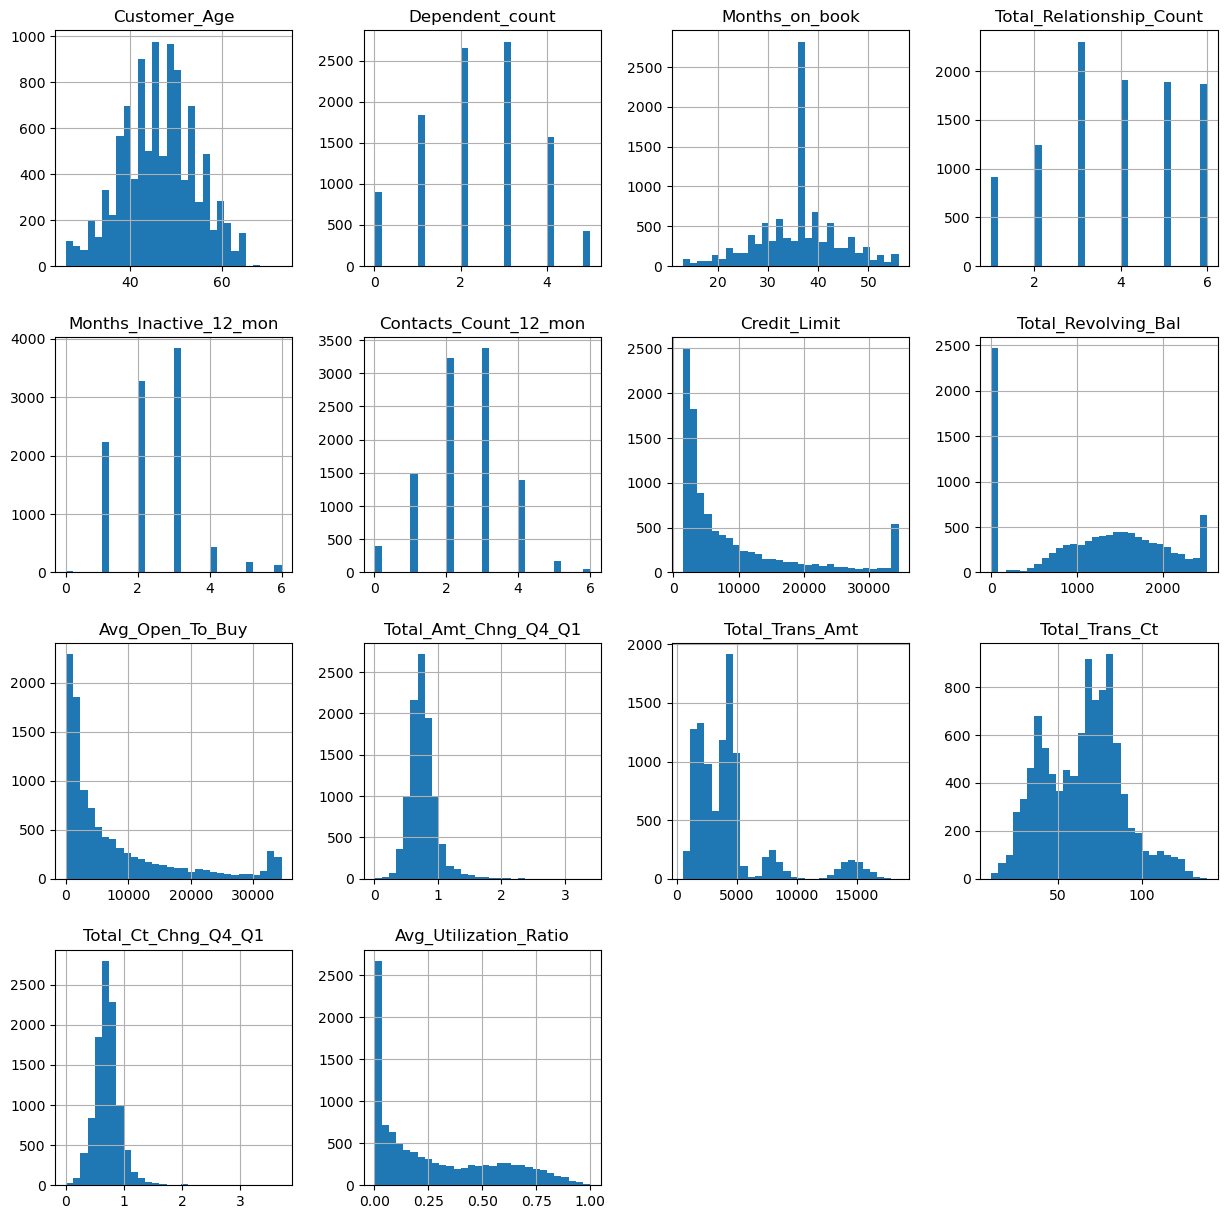

In [11]:
data.hist(figsize=(15,15), bins=30)

## Удаление выбросов

In [12]:
tmp_df = data["Months_on_book"].value_counts().reindex(data["Months_on_book"])
max_counts = tmp_df.max()

for key in tmp_df.index.dropna():
    if tmp_df.iloc[int(key)] == max_counts:
         old_value = key
         print("max_counts:", tmp_df.iloc[int(key)])
         print("old_value:", old_value)
         break

data["Months_on_book"] = data["Months_on_book"].replace(old_value, np.nan)

max_counts: 2463
old_value: 36


In [13]:
data["Total_Revolving_Bal"] = data["Total_Revolving_Bal"].loc[(data["Total_Revolving_Bal"]> 0) & (data["Total_Revolving_Bal"] < 2500)]

In [14]:
data["Credit_Limit"] = data["Credit_Limit"].loc[(data["Credit_Limit"]> 0)]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  bool   
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            7664 non-null   float64
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       7127 non-null   float64
 14  Avg_Op

array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>],
       [<Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>],
       [<Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>],
       [<Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>, <Axes: >,
        <Axes: >]], dtype=object)

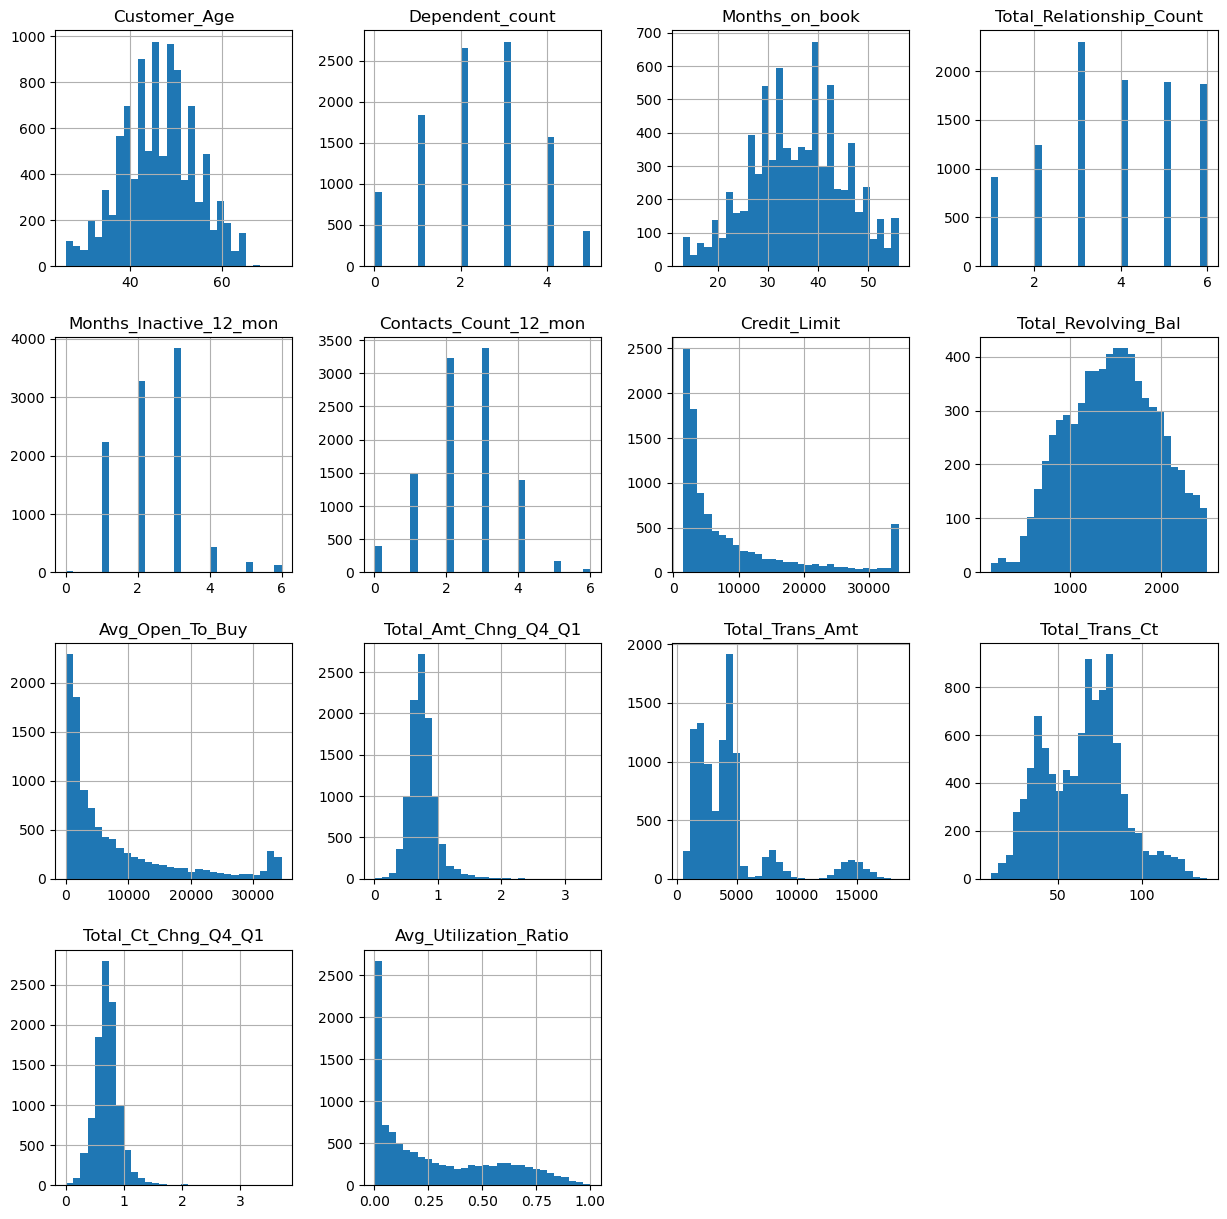

In [16]:
data.hist(figsize=(15,15), bins=30)

<Axes: xlabel='Customer_Age', ylabel='Attrition_Flag'>

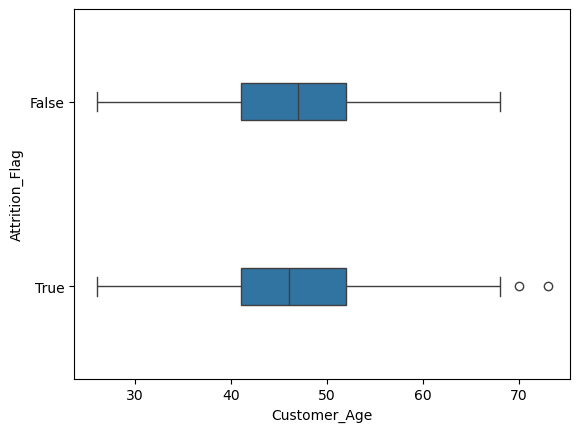

In [17]:
sns.boxplot(data=data, x="Customer_Age", y="Attrition_Flag", orient="h", width = 0.2)

<Axes: xlabel='Dependent_count'>

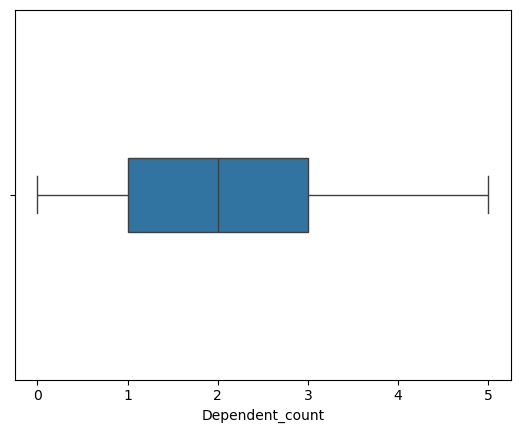

In [18]:
sns.boxplot(data=data["Dependent_count"], orient="h", width = 0.2)

<Axes: xlabel='Months_on_book'>

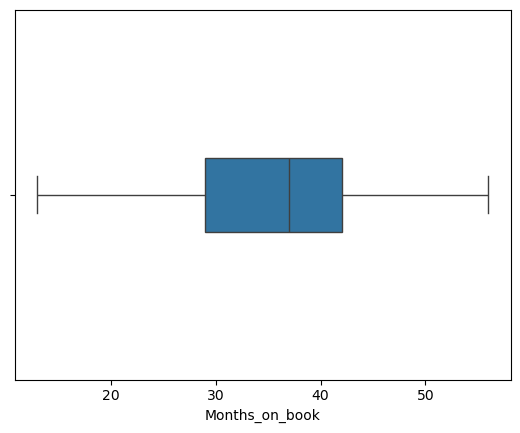

In [19]:
sns.boxplot(data=data["Months_on_book"], orient="h", width = 0.2)

<Axes: xlabel='Contacts_Count_12_mon'>

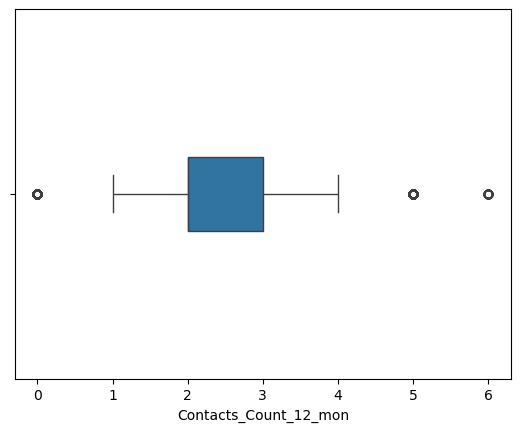

In [20]:
sns.boxplot(data=data["Contacts_Count_12_mon"], orient="h", width = 0.2)

<Axes: xlabel='Total_Revolving_Bal'>

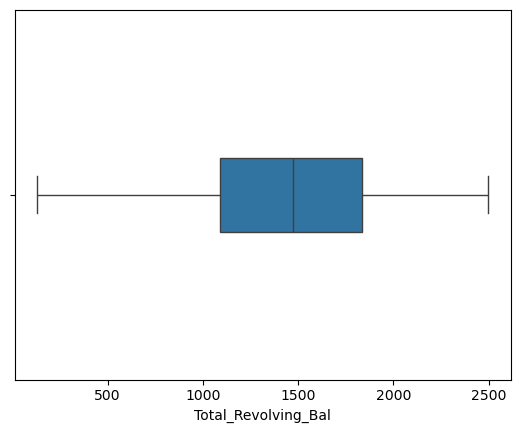

In [21]:
sns.boxplot(data=data["Total_Revolving_Bal"], orient="h", width = 0.2)

<Axes: xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Attrition_Flag'>

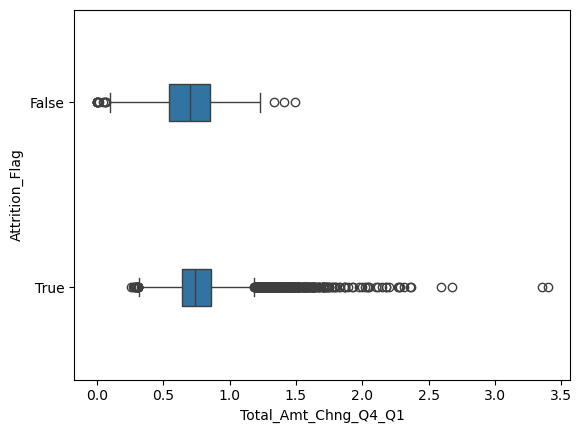

In [22]:
sns.boxplot(data=data, x="Total_Amt_Chng_Q4_Q1", y="Attrition_Flag", orient="h", width = 0.2)

<Axes: xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Attrition_Flag'>

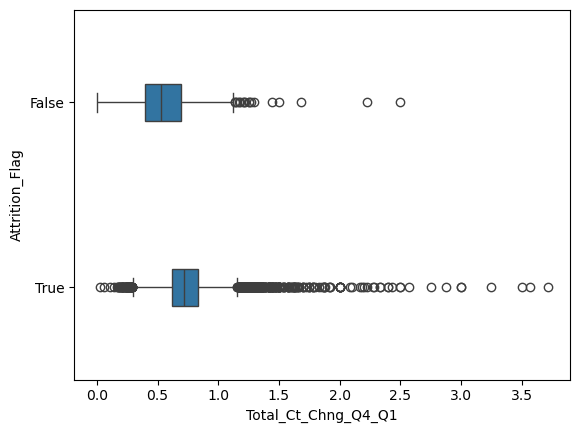

In [23]:
sns.boxplot(data=data, x="Total_Ct_Chng_Q4_Q1", y="Attrition_Flag", orient="h", width = 0.2)

<Axes: xlabel='Total_Trans_Ct'>

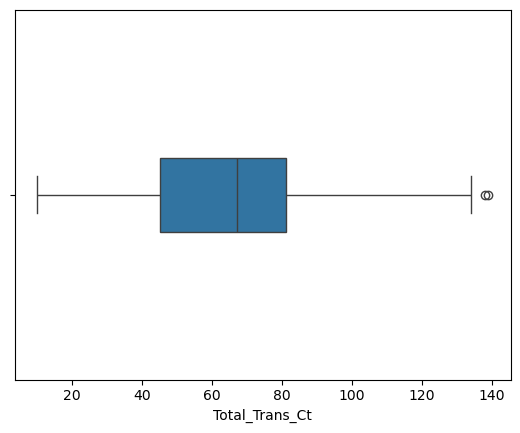

In [24]:
sns.boxplot(data=data["Total_Trans_Ct"], orient="h", width = 0.2)

In [25]:
def replace_to_nan(x):
    if (x<Q1-1.5*IQR) | (x>Q3+1.5*IQR):
        return np.nan
    else:
        return x

In [26]:
q1_q3_columns = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Ct_Chng_Q4_Q1",
    "Total_Trans_Ct",
    "Avg_Utilization_Ratio"
    ]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  bool   
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            7664 non-null   float64
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       7127 non-null   float64
 14  Avg_Op

In [28]:
for col in q1_q3_columns:
    Q1 = data[col].quantile(q=0.25)
    Q3 = data[col].quantile(q=0.75)
    IQR = Q3 - Q1

    data[col] = data[col].map(lambda x: replace_to_nan(x))


array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>],
       [<Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>],
       [<Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>],
       [<Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>, <Axes: >,
        <Axes: >]], dtype=object)

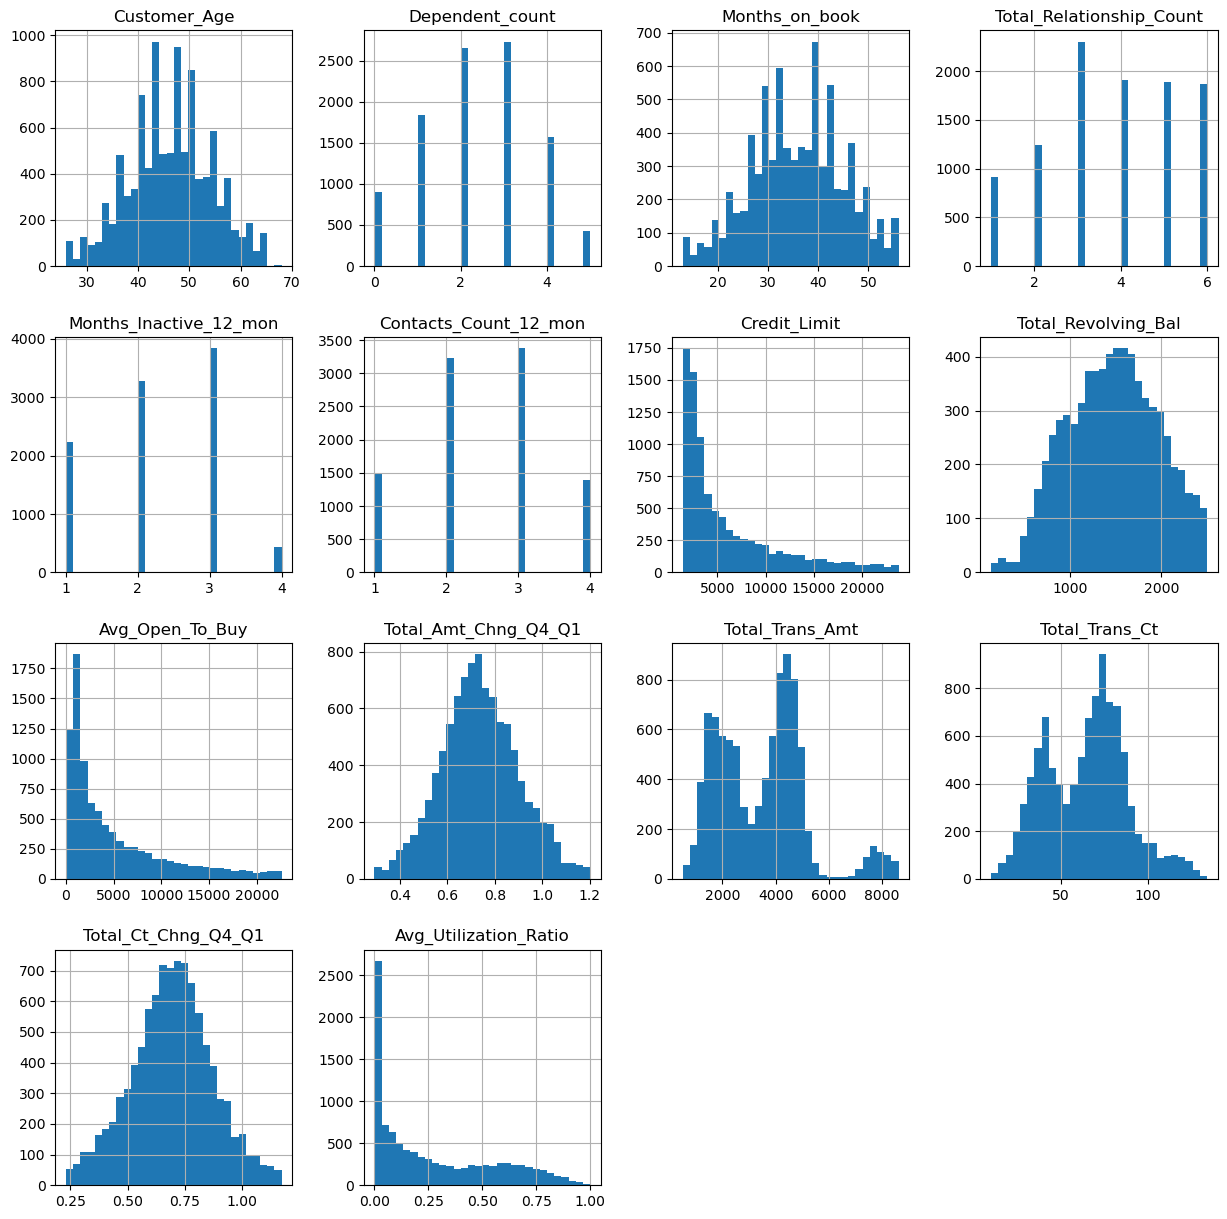

In [29]:
data.hist(figsize=(15,15), bins=30)

<Axes: xlabel='Customer_Age', ylabel='Attrition_Flag'>

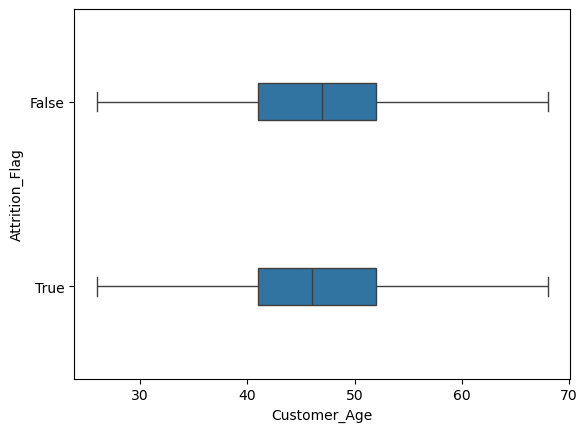

In [30]:
sns.boxplot(data=data, x="Customer_Age", y="Attrition_Flag", orient="h", width = 0.2)

<Axes: xlabel='Dependent_count'>

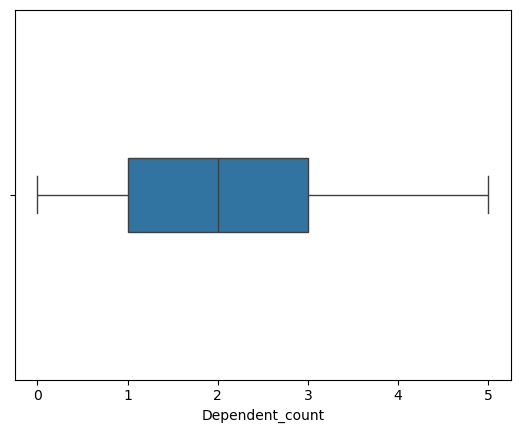

In [31]:
sns.boxplot(data=data["Dependent_count"], orient="h", width = 0.2)

<Axes: xlabel='Months_on_book'>

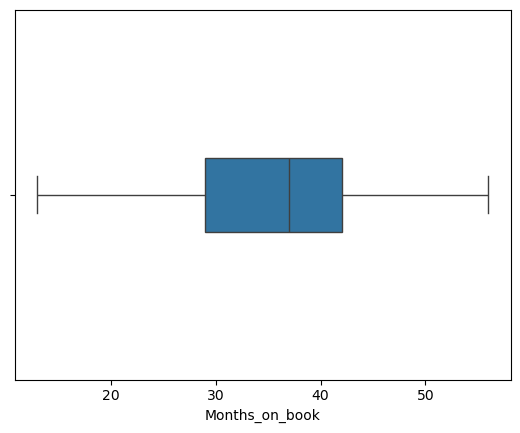

In [32]:
sns.boxplot(data=data["Months_on_book"], orient="h", width = 0.2)

<Axes: xlabel='Contacts_Count_12_mon'>

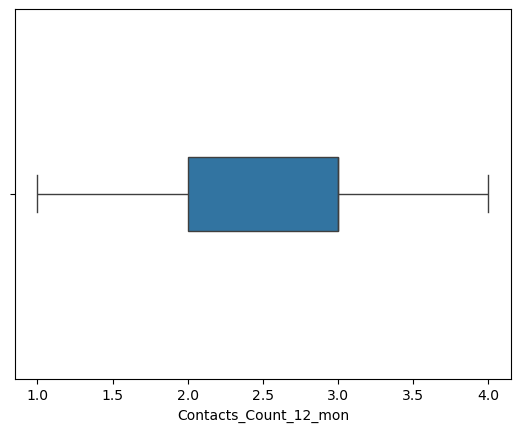

In [33]:
sns.boxplot(data=data["Contacts_Count_12_mon"], orient="h", width = 0.2)

<Axes: xlabel='Total_Revolving_Bal'>

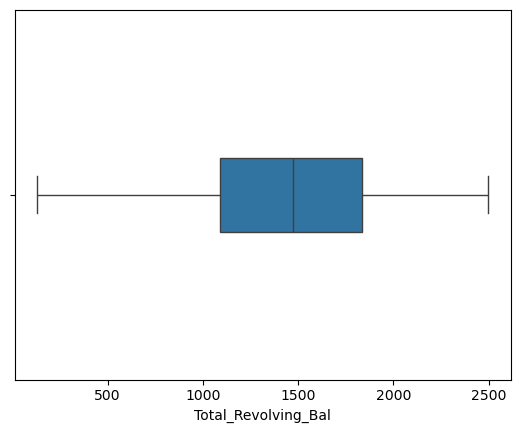

In [34]:
sns.boxplot(data=data["Total_Revolving_Bal"], orient="h", width = 0.2)

<Axes: xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Attrition_Flag'>

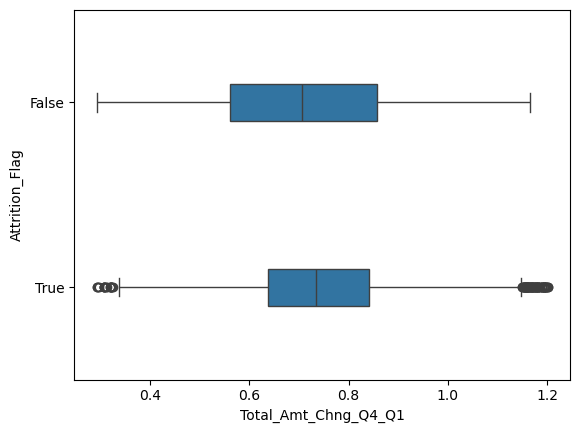

In [35]:
sns.boxplot(data=data, x="Total_Amt_Chng_Q4_Q1", y="Attrition_Flag", orient="h", width = 0.2)

<Axes: xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Attrition_Flag'>

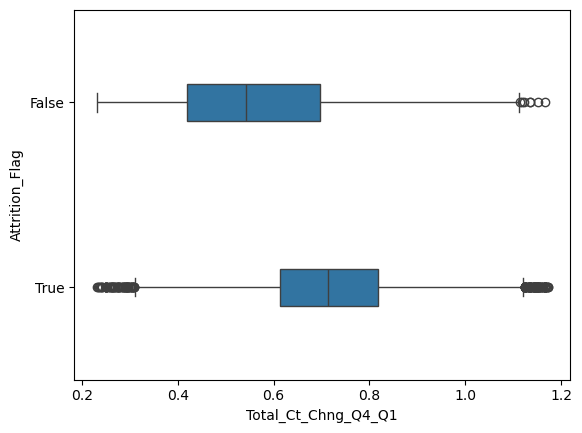

In [36]:
sns.boxplot(data=data, x="Total_Ct_Chng_Q4_Q1", y="Attrition_Flag", orient="h", width = 0.2)

<Axes: xlabel='Total_Trans_Ct'>

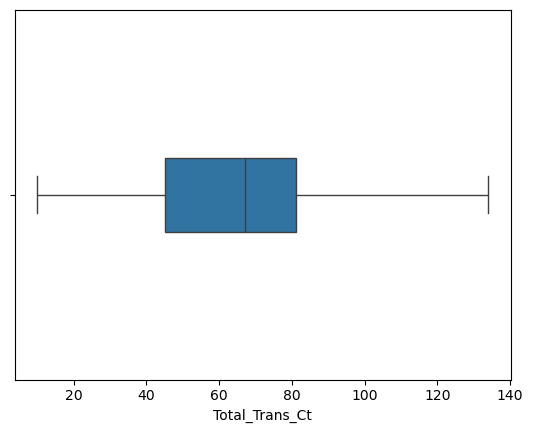

In [37]:
sns.boxplot(data=data["Total_Trans_Ct"], orient="h", width = 0.2)

## Качественные признаки

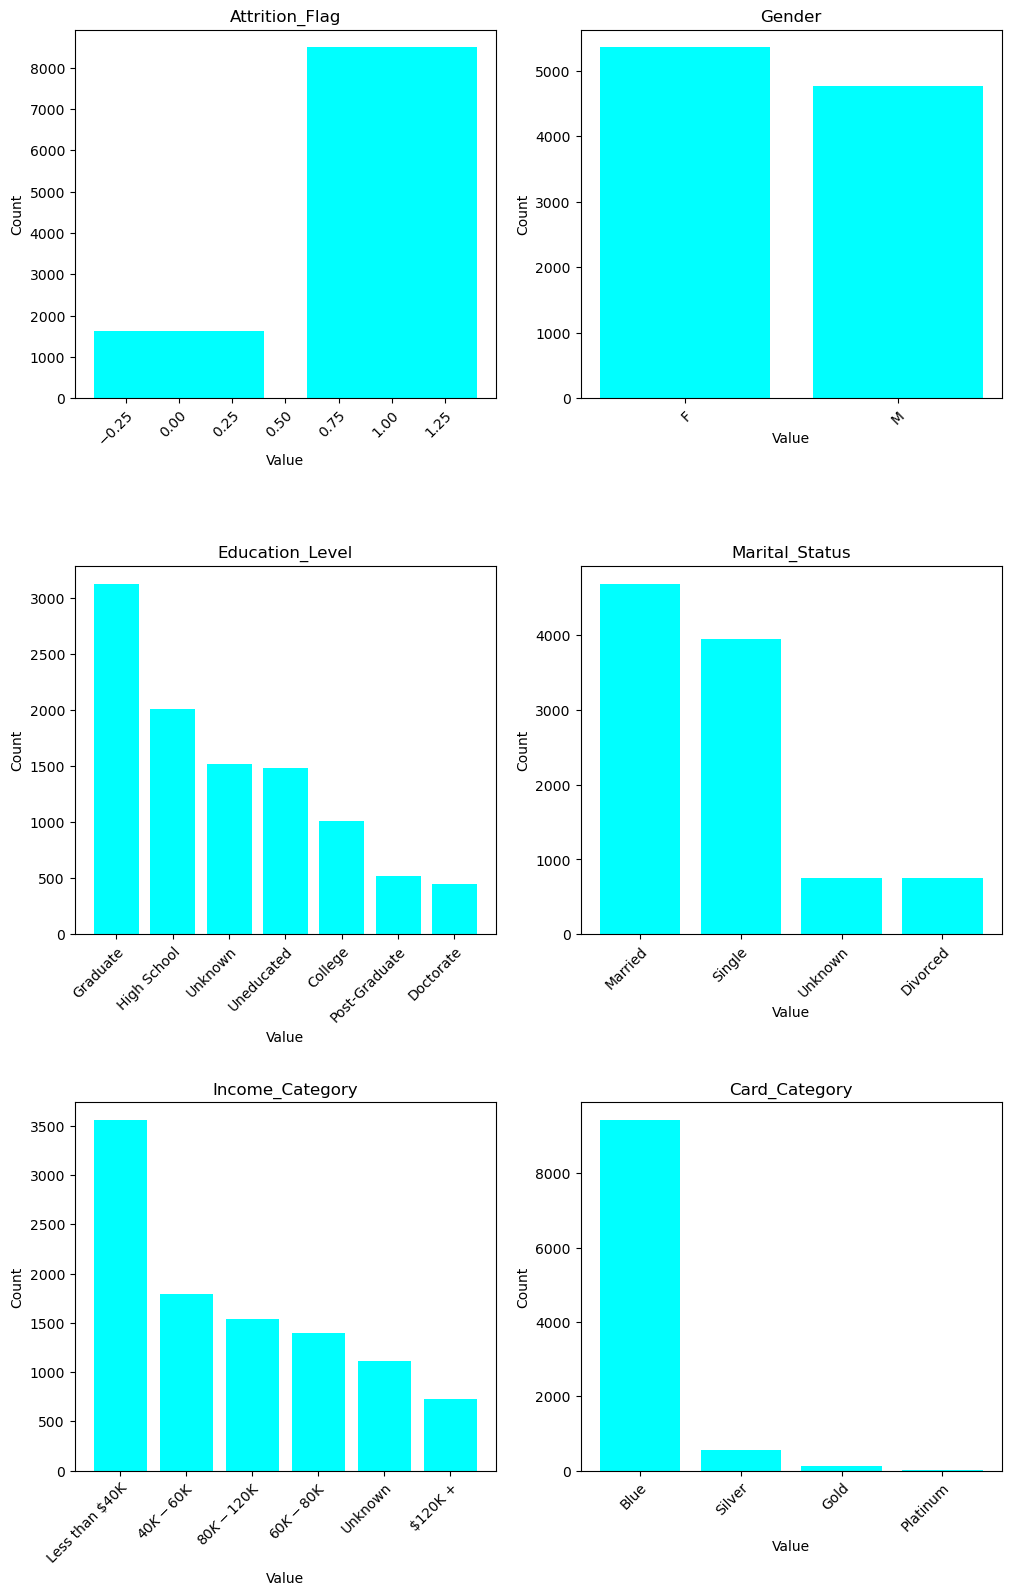

In [38]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
fig.tight_layout(h_pad=10, w_pad=3)

for index, col in enumerate(object_columns):
    axs[index//2,index%2].set_title(col)
    axs[index//2,index%2].set_xlabel("Value")
    axs[index//2,index%2].set_ylabel("Count")
    
    axs[index//2,index%2].bar(data[col].value_counts().index, data[col].value_counts(), color="cyan")
    plt.setp(axs[index//2,index%2].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


plt.show()

In [39]:
group_attrition_flag = data.groupby("Attrition_Flag")

In [101]:
def handle_data_to_draw(
    data,
    column,
    in_percentages,
):

    existing_customer = data[column].value_counts().loc[True,]
    not_existing_customer = data[column].value_counts().loc[False,]

    if in_percentages:
        existing_count = data[column].count().loc[True,]
        not_existing_count = data[column].count().loc[False,]

        existing_customer = (existing_customer / existing_count * 100).astype(int)
        not_existing_customer = (not_existing_customer / not_existing_count * 100).astype(int)
   
    return existing_customer, not_existing_customer

In [102]:
def draw_exist_not_exist_customer(
    column,
    data=group_attrition_flag,
    in_percentages=False,
    ):

    existing_customer, not_existing_customer = handle_data_to_draw(
        data=data,
        column=column,
        in_percentages=in_percentages
    )
    

    fig, axs = plt.subplots(
        1,
        2,
        figsize=(10, 5),
        sharex=True,
      # sharey=True
        )

    plt.suptitle(column.replace("_", " "))

    axs[0].set_title("Existing Customer")
    axs[0].set_ylabel("Count")
    bar = axs[0].bar(
        existing_customer.index,
        existing_customer,
        color="limegreen"
    )
    if in_percentages:
        axs[0].bar_label(bar)

    axs[1].set_title("Attrited Customer")
    axs[1].set_ylabel("Count")
    bar = axs[1].bar(
        not_existing_customer.index,
        not_existing_customer,
        color="coral",
        )
    if in_percentages:
       axs[1].bar_label(bar)

    plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    plt.show()

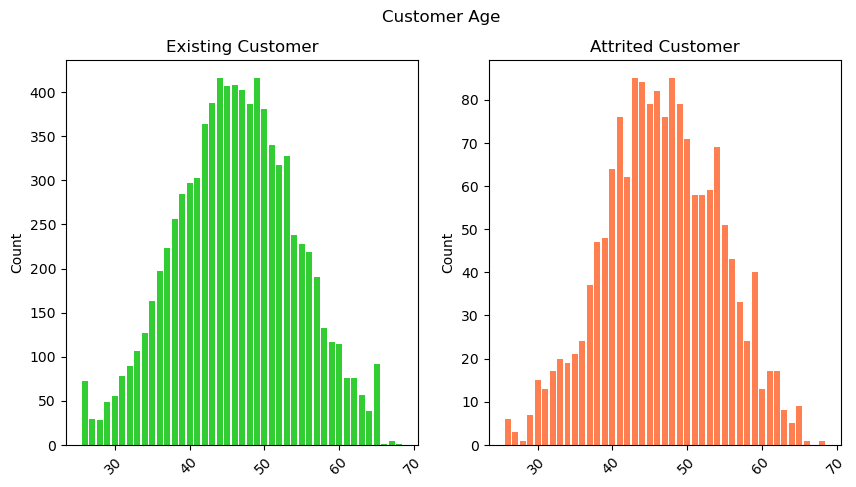

In [103]:
draw_exist_not_exist_customer("Customer_Age")

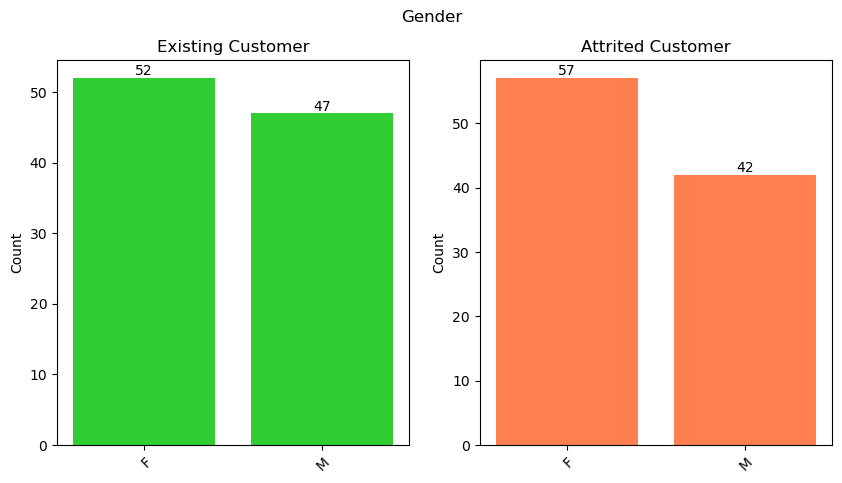

In [104]:
draw_exist_not_exist_customer("Gender", in_percentages=True)

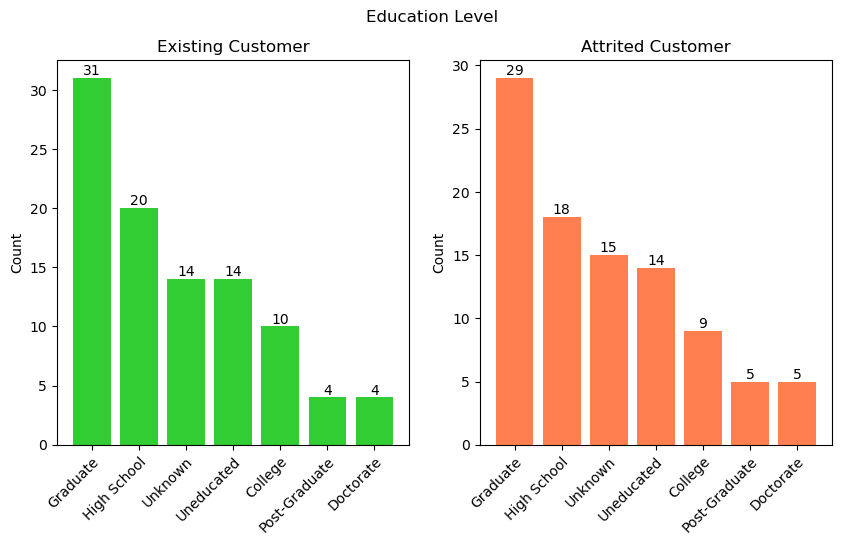

In [107]:
draw_exist_not_exist_customer("Education_Level", in_percentages=True)

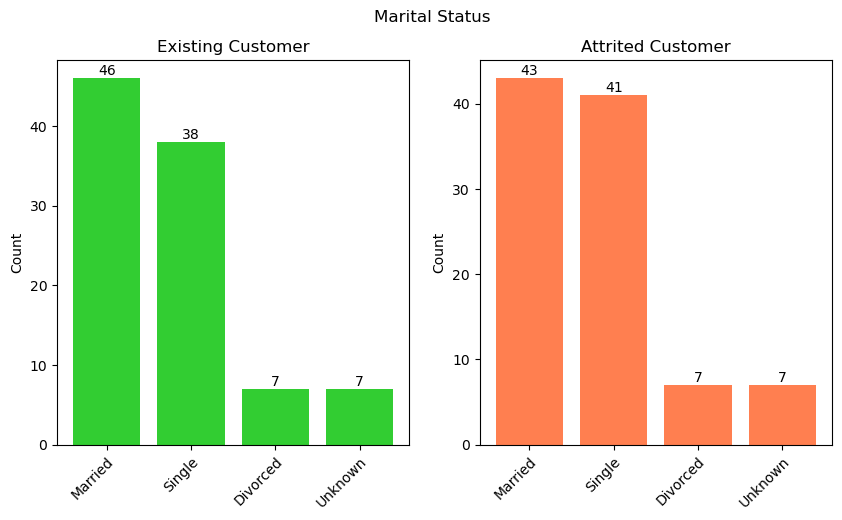

In [108]:
draw_exist_not_exist_customer("Marital_Status", in_percentages=True)

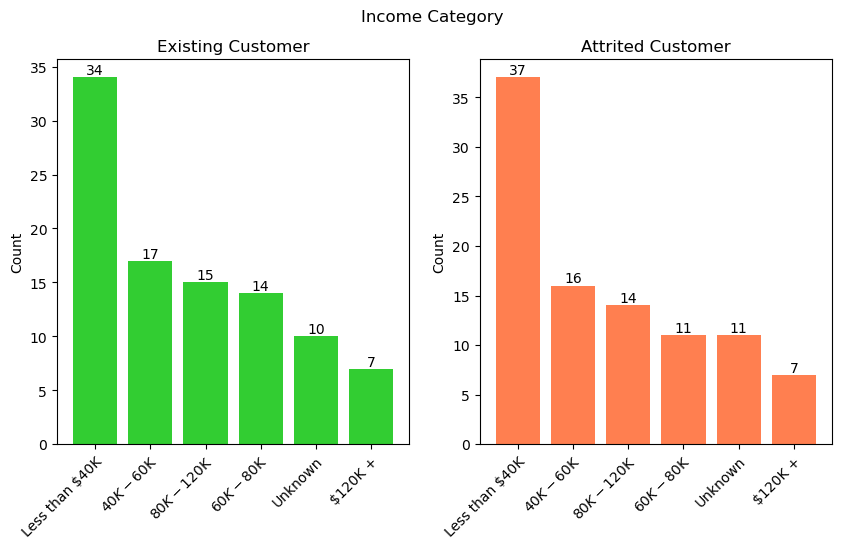

In [110]:
draw_exist_not_exist_customer("Income_Category", in_percentages=True)

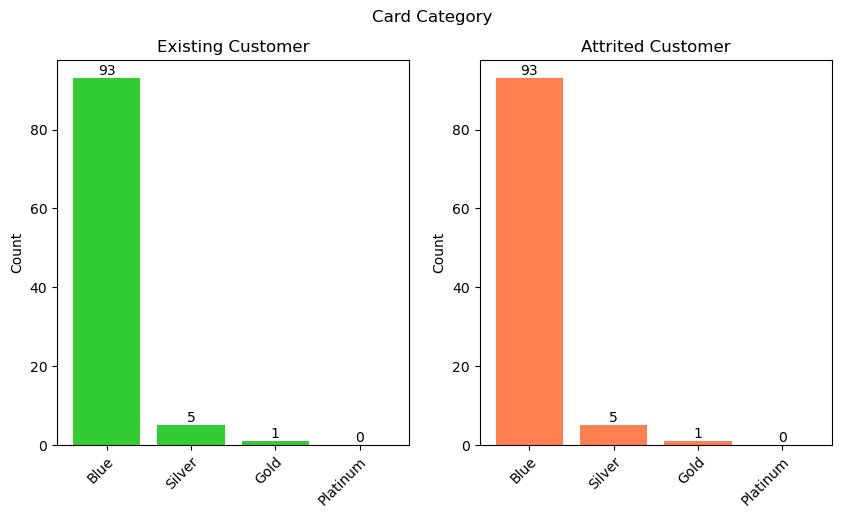

In [112]:
draw_exist_not_exist_customer("Card_Category", in_percentages=True)

## Количественные признаки

In [348]:
quantitative_columns = [ # Количественные признаки
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
    ]

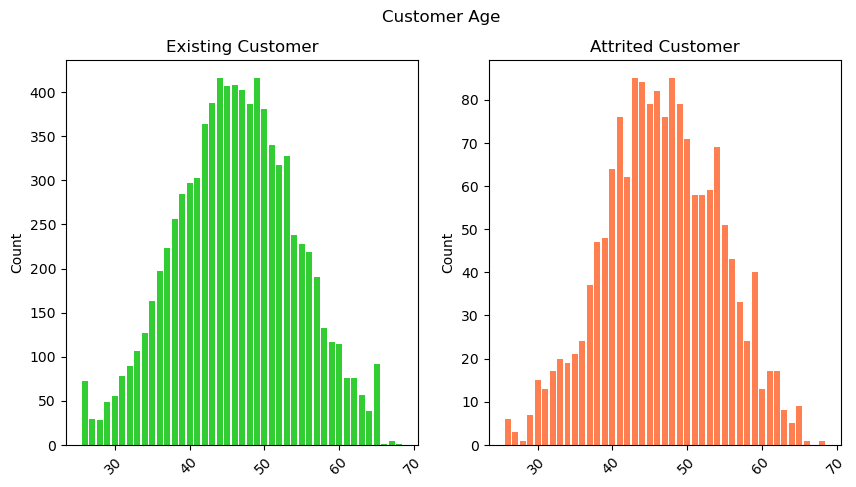

In [349]:
draw_exist_not_exist_customer("Customer_Age")

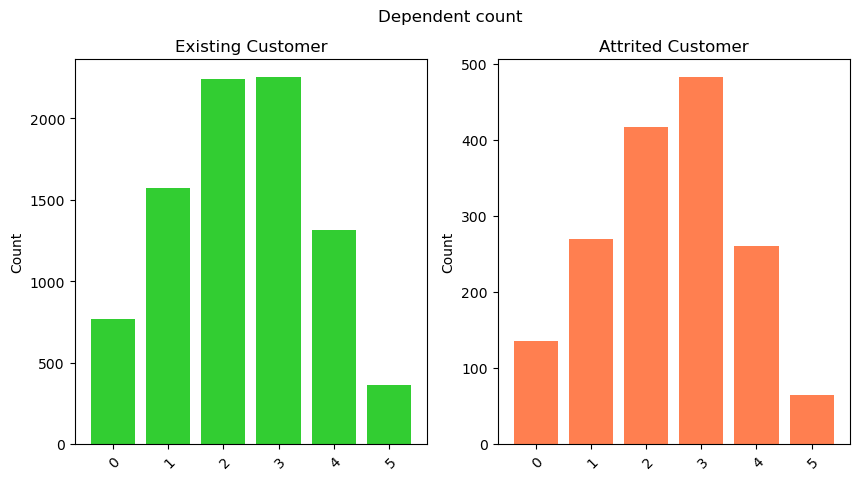

In [350]:
draw_exist_not_exist_customer("Dependent_count")

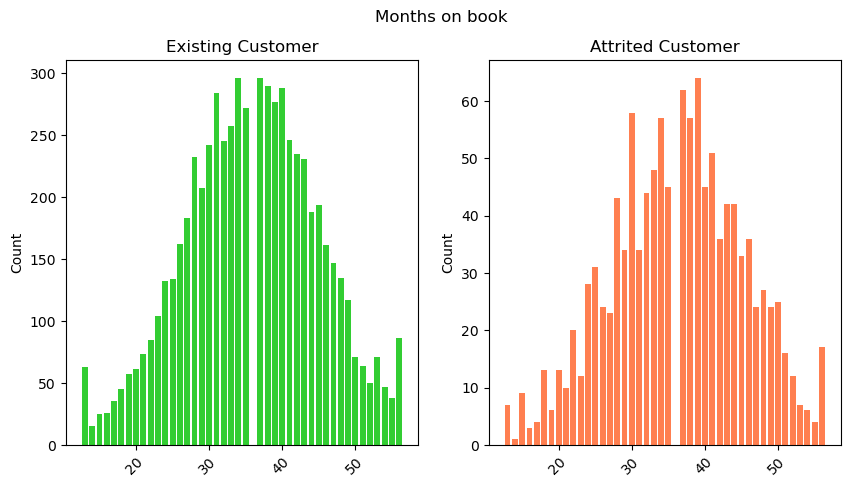

In [351]:
draw_exist_not_exist_customer("Months_on_book")

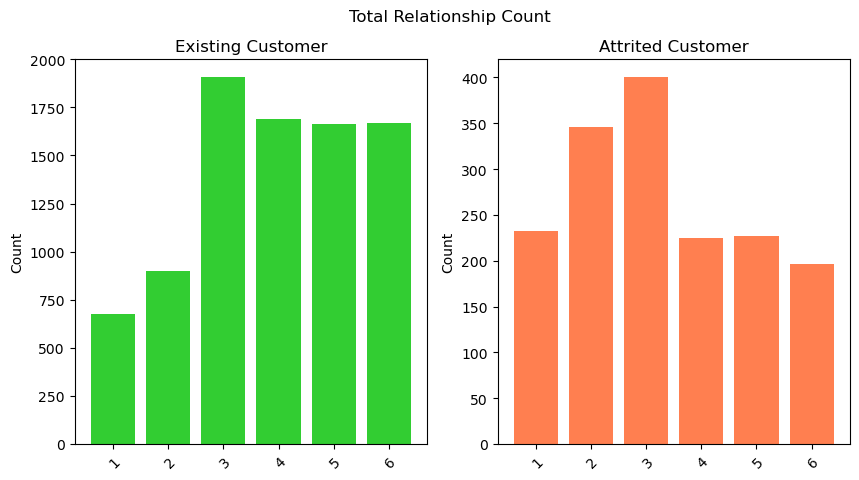

In [352]:
draw_exist_not_exist_customer("Total_Relationship_Count")

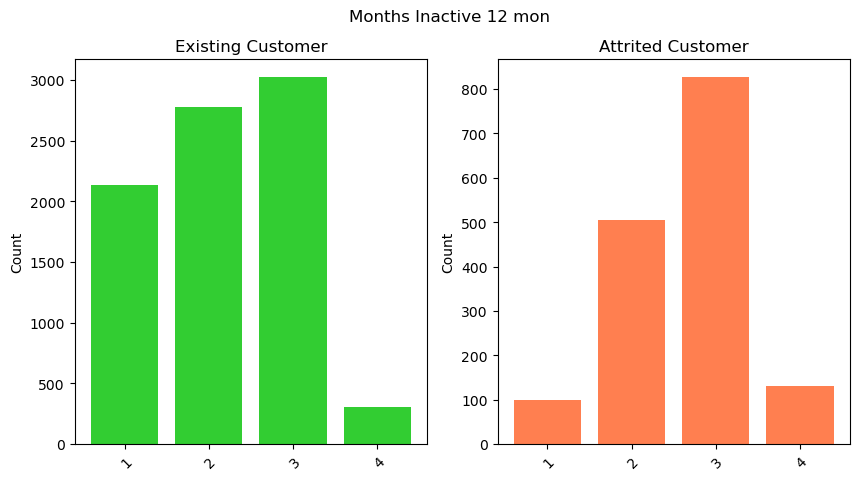

In [353]:
draw_exist_not_exist_customer("Months_Inactive_12_mon")

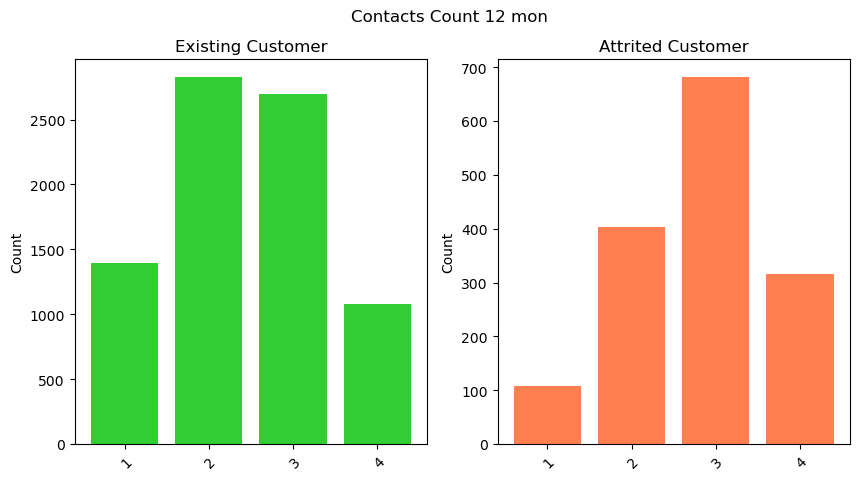

In [354]:
draw_exist_not_exist_customer("Contacts_Count_12_mon")

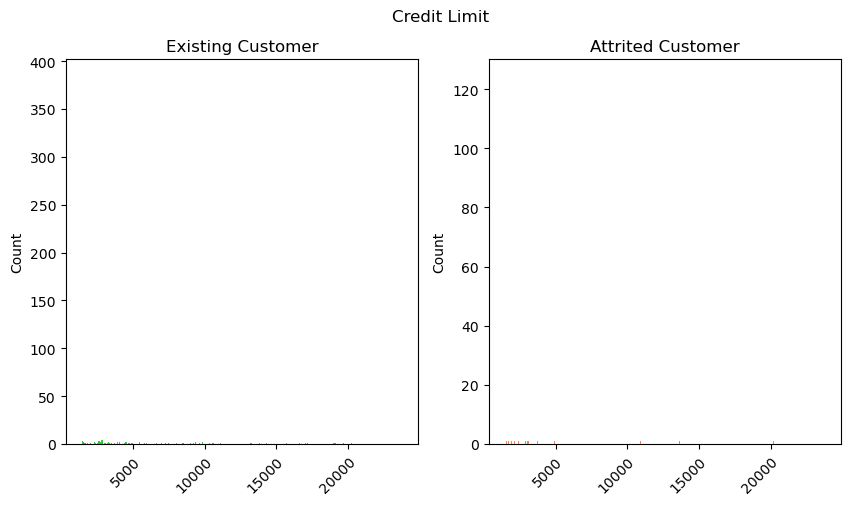

In [355]:
draw_exist_not_exist_customer("Credit_Limit")

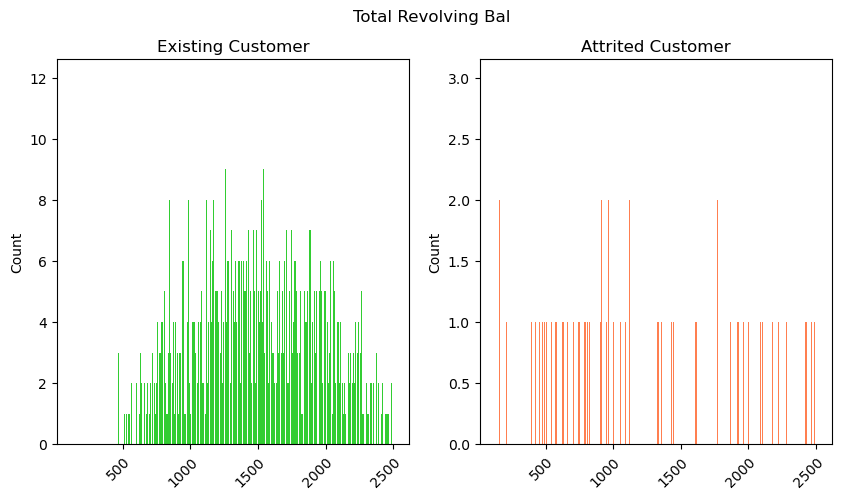

In [356]:
draw_exist_not_exist_customer("Total_Revolving_Bal")

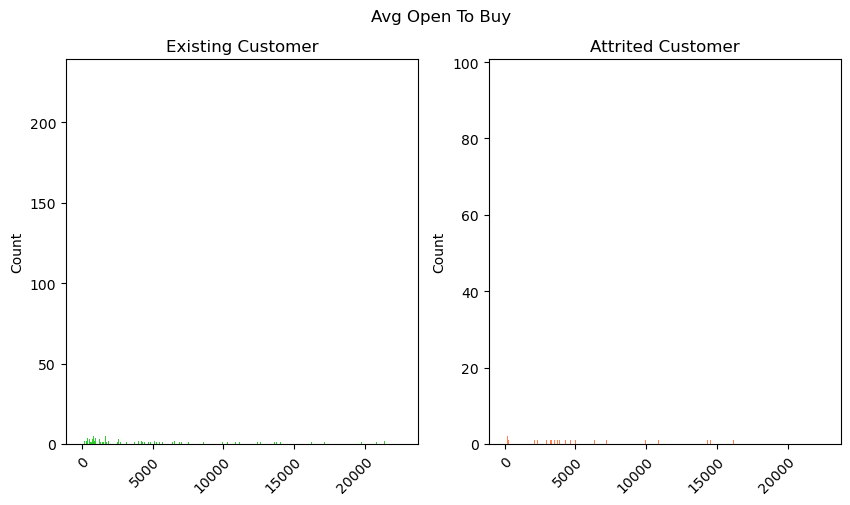

In [357]:
draw_exist_not_exist_customer("Avg_Open_To_Buy")

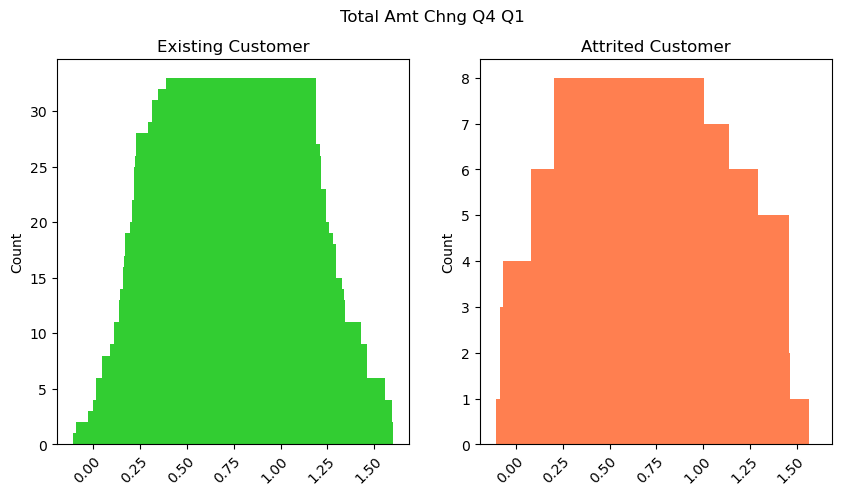

In [358]:
draw_exist_not_exist_customer("Total_Amt_Chng_Q4_Q1")

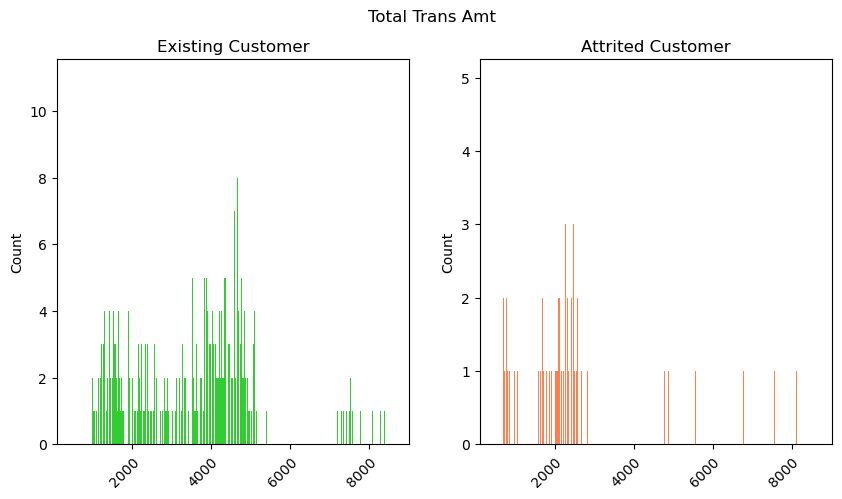

In [359]:
draw_exist_not_exist_customer("Total_Trans_Amt")

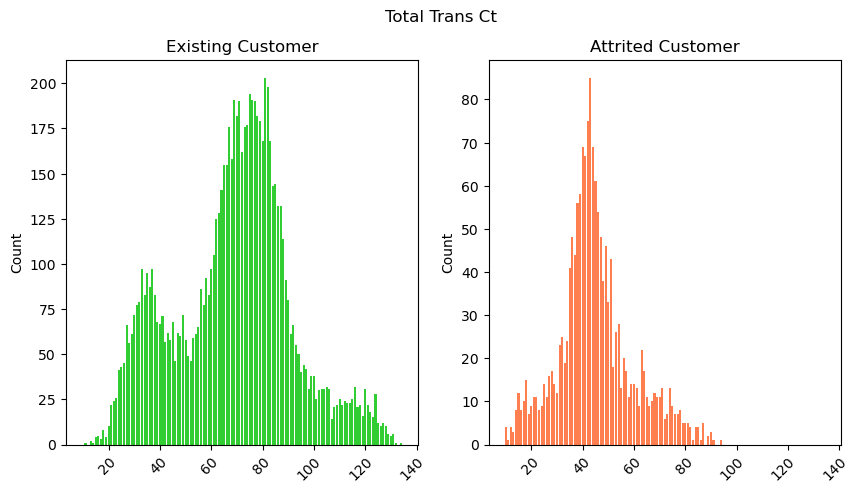

In [360]:
draw_exist_not_exist_customer("Total_Trans_Ct")

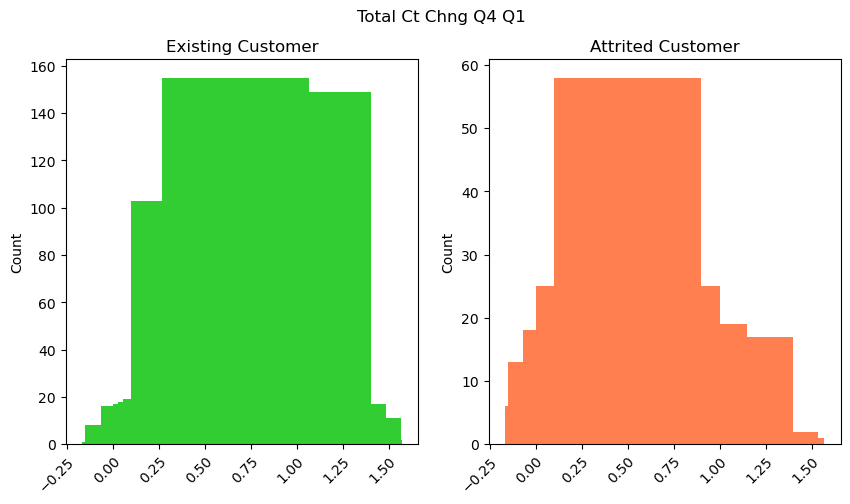

In [361]:
draw_exist_not_exist_customer("Total_Ct_Chng_Q4_Q1")

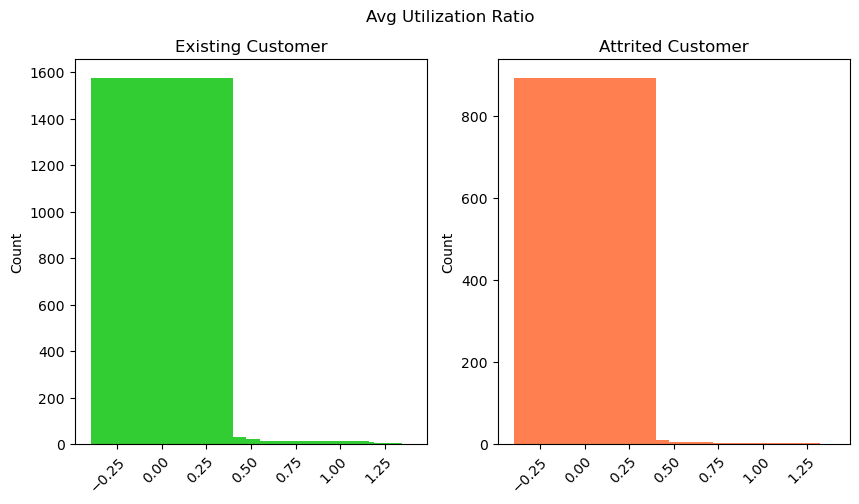

In [362]:
draw_exist_not_exist_customer("Avg_Utilization_Ratio")

In [363]:
data["credit_limit_count"] = data["Credit_Limit"].value_counts()

scatter_data = pd.DataFrame(data["Attrition_Flag"])

scatter_data["Credit_Limit"] = data["Credit_Limit"]
scatter_data["Total_Revolving_Bal"] = data["Total_Revolving_Bal"]
scatter_data["Avg_Open_To_Buy"] = data["Avg_Open_To_Buy"]

scatter_data["count_credit_limit"] = data["Credit_Limit"].value_counts()
scatter_data["count_total_revolving_bal"] = data["Total_Revolving_Bal"].value_counts()
scatter_data["count_avg_open_to_buy"] = data["Avg_Open_To_Buy"].value_counts()

<Axes: xlabel='Credit_Limit', ylabel='count_credit_limit'>

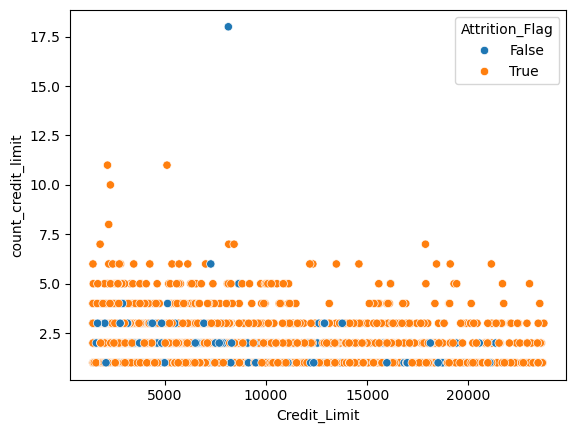

In [364]:
sns.scatterplot(data=scatter_data, x="Credit_Limit", y="count_credit_limit", hue="Attrition_Flag")

<Axes: xlabel='Total_Revolving_Bal', ylabel='count_total_revolving_bal'>

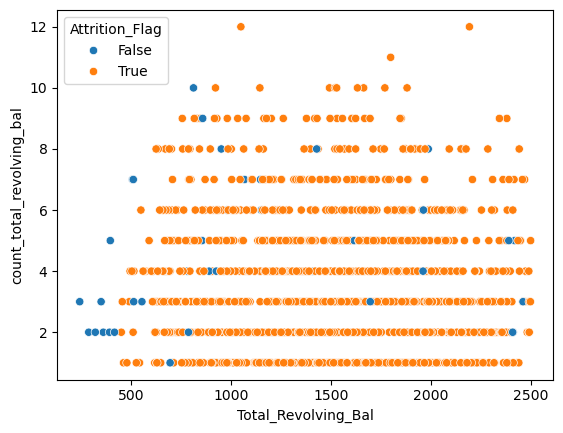

In [365]:
sns.scatterplot(data=scatter_data, x="Total_Revolving_Bal", y="count_total_revolving_bal", hue="Attrition_Flag")

<Axes: xlabel='Avg_Open_To_Buy', ylabel='count_avg_open_to_buy'>

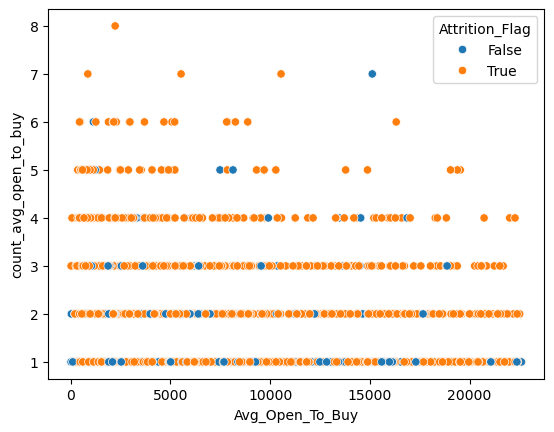

In [366]:
sns.scatterplot(data=scatter_data, x="Avg_Open_To_Buy", y="count_avg_open_to_buy", hue="Attrition_Flag")

In [370]:
data.T.head(n=20)

,0,1,2,3,4,5,6,7,8,9,...,10117,10118,10119,10120,10121,10122,10123,10124,10125,10126
Attrition_Flag,True,True,True,True,True,True,True,True,True,True,...,True,False,False,True,True,True,False,False,False,False
Customer_Age,45.0,49.0,51.0,40.0,40.0,44.0,51.0,32.0,37.0,48.0,...,57.0,50.0,55.0,54.0,56.0,50.0,41.0,44.0,30.0,43.0
Gender,M,F,M,F,M,M,M,M,M,M,...,M,M,F,M,F,M,M,F,M,F
Dependent_count,3,5,3,4,3,2,4,0,3,2,...,2,1,3,1,1,2,2,1,2,2
Education_Level,High School,Graduate,Graduate,High School,Uneducated,Graduate,Unknown,High School,Uneducated,Graduate,...,Graduate,Unknown,Uneducated,High School,Graduate,Graduate,Unknown,High School,Graduate,Graduate
Marital_Status,Married,Single,Married,Unknown,Married,Married,Married,Unknown,Single,Single,...,Married,Unknown,Single,Single,Single,Single,Divorced,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K,$40K - $60K,$120K +,$60K - $80K,$60K - $80K,$80K - $120K,...,$80K - $120K,$80K - $120K,Unknown,$60K - $80K,Less than $40K,$40K - $60K,$40K - $60K,Less than $40K,$40K - $60K,Less than $40K
Card_Category,Blue,Blue,Blue,Blue,Blue,Blue,Gold,Silver,Blue,Blue,...,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Silver
Months_on_book,39.0,44.0,NaN,34.0,21.0,NaN,46.0,27.0,NaN,NaN,...,40.0,NaN,47.0,34.0,50.0,40.0,25.0,NaN,NaN,25.0
Total_Relationship_Count,5,6,4,3,5,3,6,2,5,6,...,6,6,4,5,4,3,4,5,4,6


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  bool   
 1   Customer_Age              10125 non-null  float64
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            7664 non-null   float64
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    9796 non-null   float64
 11  Contacts_Count_12_mon     9498 non-null   float64
 12  Credit_Limit              9143 non-null   float64
 13  Total_Revolving_Bal       7127 non-null   float64
 14  Avg_Op

<Axes: >

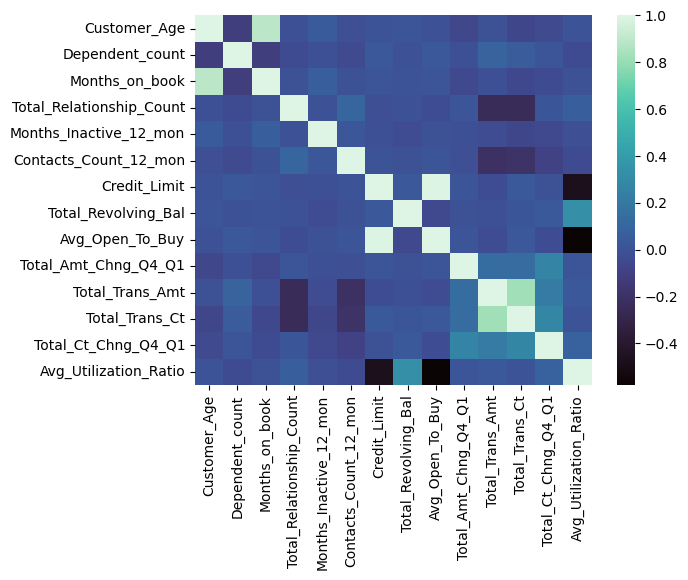

In [372]:
sns.heatmap(data[quantitative_columns].corr(), cmap="mako")

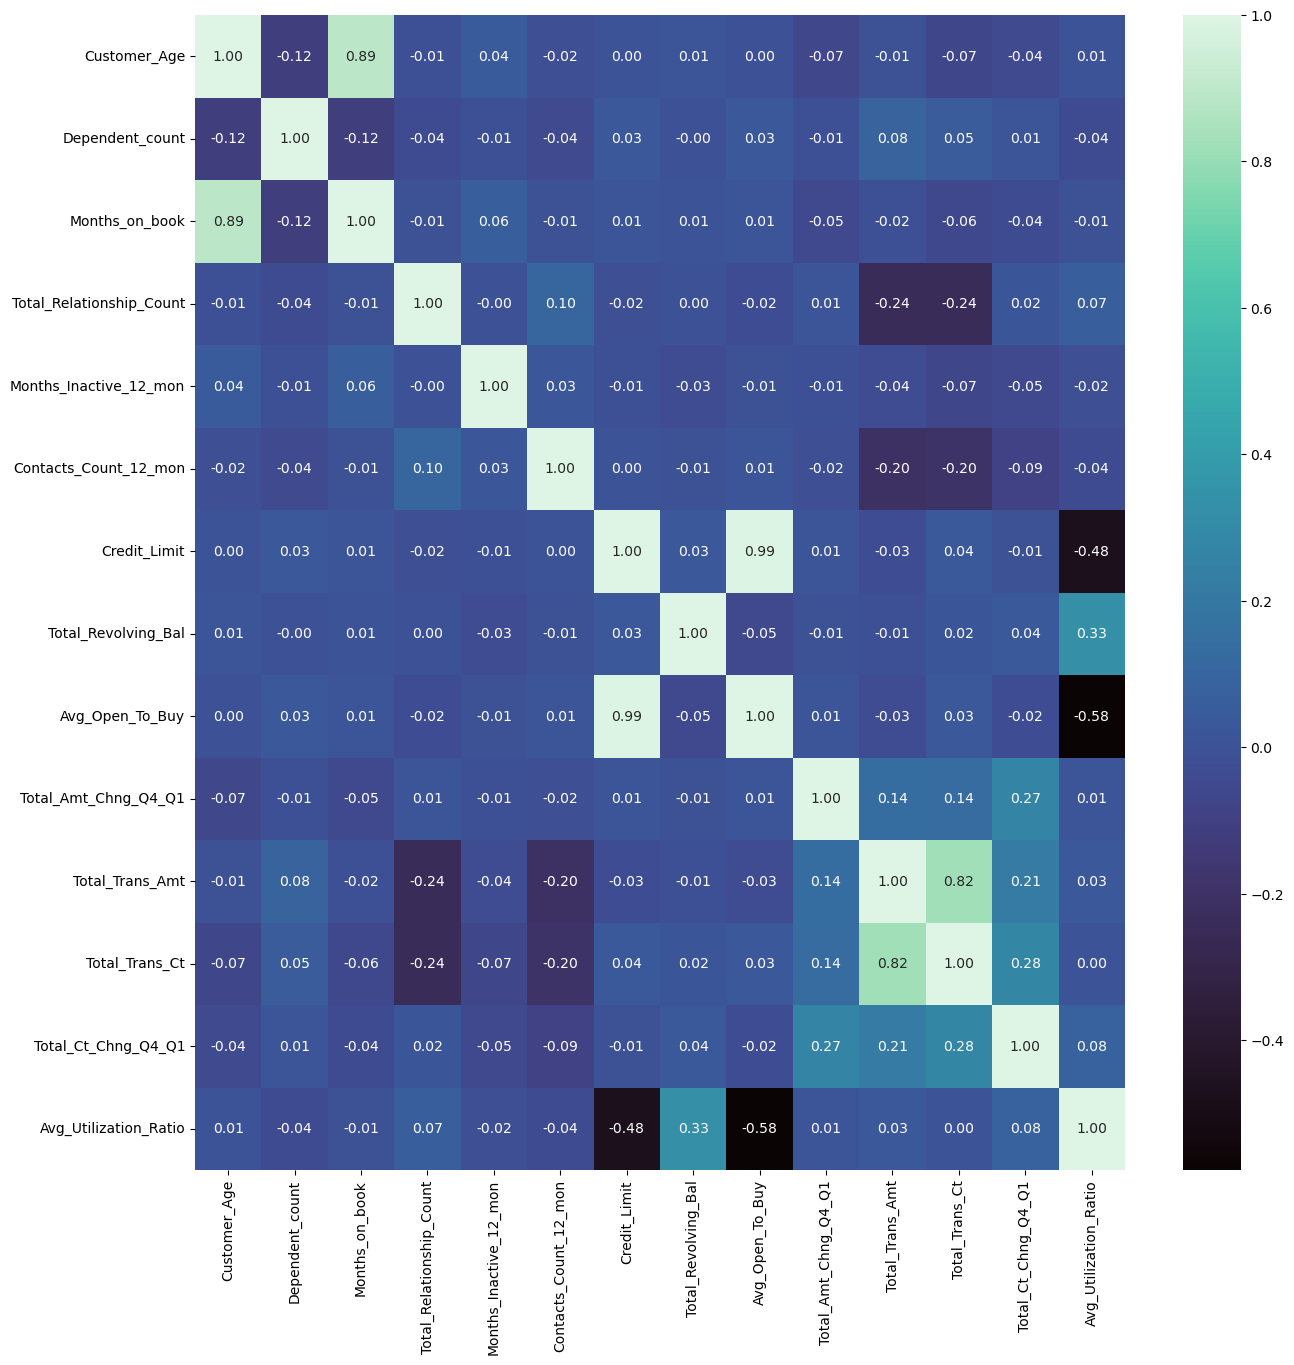

In [373]:
plt.figure(figsize=(15, 15))
sns.heatmap(data[quantitative_columns].corr(), annot=True, fmt=".2f", cmap="mako")
plt.show()

In [ ]:
sns.pairplot(data[quantitative_columns])